<a href="https://colab.research.google.com/github/delimaNatalia/network-intrusion-detection/blob/main/network_intrusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Intrusion Detection

## Network Intrusion Detection

### Context
Network intrusion detection is a highly imbalanced classification problem, where malicious traffic
represents a very small fraction of the total data. This makes traditional accuracy-based evaluation
misleading and requires careful model selection and validation.

### Objective
The goal of this project is to detect malicious network activity by distinguishing benign traffic
from multiple types of attacks, with particular attention to recall attack classes.

### Approaches Tested
- **Supervised classification models**, including Random Forest and other baseline classifiers.
- **Unsupervised anomaly detection** using Isolation Forest, aiming to identify attacks as outliers.
- **Dimensionality reduction** using PCA to mitigate feature redundancy and noise.

### Key Findings
- Random Forest achieved strong overall performance and robust recall for attack detection,
  even under severe class imbalance.
- Isolation Forest struggled to separate benign and malicious traffic effectively.
- Applying PCA before supervised models improved stability and reduced noise and computational cost, while maintaining competitive performance.

### Final Model
The final approach combines **PCA for dimensionality reduction** with a **Random Forest classifier**.
This choice reflects a balance between interpretability, robustness, and practical performance
on rare attack detection.

### Notes
This project prioritizes detection reliability over novelty. While more complex models (e.g. gradient boosting) were considered, the selected approach was chosen based on empirical performance rather than model complexity.




# Data Collection


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'network-intrusion-dataset' dataset.
Path to dataset files: /kaggle/input/network-intrusion-dataset


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv


In [3]:
base_path = '/kaggle/input/network-intrusion-dataset'

#all csv files
try:
    csv_files = [f for f in os.listdir(base_path) if f.endswith('csv')]
    print(f"Found {len(csv_files)} CSV files:")
    for i, file in enumerate(csv_files,1):
        print(f" {i}.{file}")
except:
    print("The base path for the dataset is not correct.")
    csv_files = []


#load all csv files and combine load a subset first
dfs = []

if csv_files:
    for file in csv_files:
        try:
            df_temp = pd.read_csv(os.path.join(base_path, file), encoding='utf-8')
            dfs.append(df_temp)
            print(f"Loaded {file}: {df_temp.shape}")
        except Exception as e:
            print(f"Error Loading..")

    #combine all dataframes
    df = pd.concat(dfs, ignore_index = True)
    print(f"Total Dataset: {df.shape}")
    print(f"Total Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

else:
    print("Loading Samples")
    df = pd.DataFrame()


#display first few rows
if not df.empty:
    display(df.head())

Found 8 CSV files:
 1.Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
 2.Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
 3.Tuesday-WorkingHours.pcap_ISCX.csv
 4.Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
 5.Monday-WorkingHours.pcap_ISCX.csv
 6.Friday-WorkingHours-Morning.pcap_ISCX.csv
 7.Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
 8.Wednesday-workingHours.pcap_ISCX.csv
Loaded Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv: (286467, 79)
Loaded Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv: (170366, 79)
Loaded Tuesday-WorkingHours.pcap_ISCX.csv: (445909, 79)
Loaded Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv: (225745, 79)
Loaded Monday-WorkingHours.pcap_ISCX.csv: (529918, 79)
Loaded Friday-WorkingHours-Morning.pcap_ISCX.csv: (191033, 79)
Loaded Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv: (288602, 79)
Loaded Wednesday-workingHours.pcap_ISCX.csv: (692703, 79)
Total Dataset: (2830743, 79)
Total Rows: 2,830,743 | Column

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [5]:
df.columns = [column_name.lstrip() for column_name in df.columns]


# Explorative Data Analysis

In [ ]:
import matplotlib.pyplot as plt


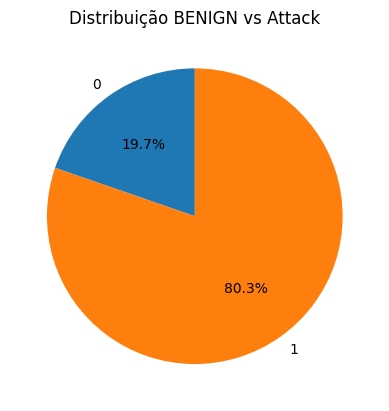

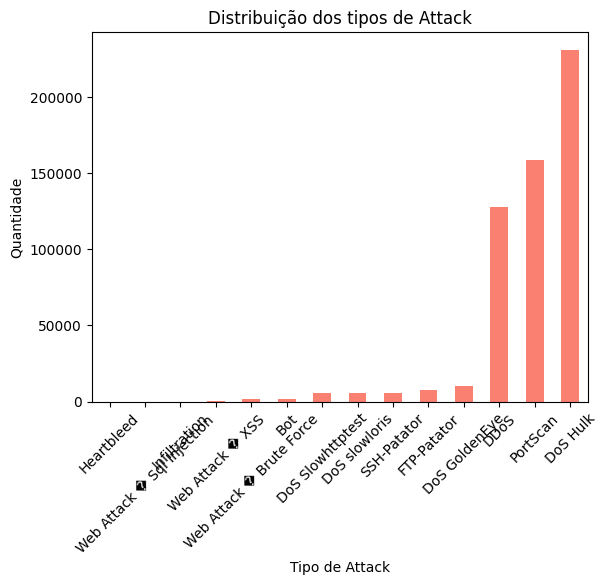

In [ ]:
import matplotlib.pyplot as plt

# Label distribution
label_distribution = (
    df.groupby('Label')
      .size()
      .reset_index(name='Count')
)

# Individual attack types (excluding BENIGN)
attacks = (
    label_distribution[label_distribution['Label'] != "BENIGN"]
    .sort_values(by="Count")
    .set_index('Label')
)

# Binary distribution: BENIGN vs ATTACK
danger_distribution = label_distribution.copy()
danger_distribution.loc[
    danger_distribution['Label'] != "BENIGN", 'Label'
] = "ATTACK"

danger_distribution = (
    danger_distribution
    .groupby('Label', as_index=False)['Count']
    .sum()
)

# ---- PIE CHART: BENIGN vs ATTACK ----
plt.figure()
plt.pie(
    danger_distribution['Count'],
    labels=danger_distribution['Label'],   # <- labels corretos
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Benign vs Attack Traffic')
plt.show()

# ---- BAR CHART: Attack Types ----
plt.figure()
attacks['Count'].plot(kind='bar')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
attacks.head()

,Count
Label,
Heartbleed,11
Web Attack � Sql Injection,21
Infiltration,36
Web Attack � XSS,652
Web Attack � Brute Force,1507


In [ ]:
dos_hulk = df[df['Label'] == "DoS Hulk"]
port_scan = df[df['Label'] == "PortScan"]
ddos = df[df['Label'] == "DDoS"]

df_mean = df.drop(columns='Label').mean()
dos_hulk_mean = dos_hulk.drop(columns='Label').mean()
port_scan_mean = port_scan.drop(columns='Label').mean()
ddos_mean = ddos.drop(columns='Label').mean()

comparison_df = pd.DataFrame({
    'Geral': df_mean,
    'DoS Hulk': dos_hulk_mean,
    'Port Scan': port_scan_mean,
    'DDoS': ddos_mean
})

comparison_df.head()


,Geral,DoS Hulk,Port Scan,DDoS
Destination Port,8.071483e+03,8.000000e+01,8624.460177,8.122738e+01
Flow Duration,1.478566e+07,5.708173e+07,82820.228371,1.695559e+07
Total Fwd Packets,9.361160e+00,5.279656e+00,1.017580,4.472439e+00
Total Backward Packets,1.039377e+01,4.205688e+00,1.004958,3.255821e+00
Total Length of Fwd Packets,5.493024e+02,2.813314e+02,1.089171,3.190860e+01


In [ ]:
df_mode = df.drop(columns='Label').mode().iloc[0]
dos_hulk_mode = dos_hulk.drop(columns='Label').mode().iloc[0]
port_scan_mode = port_scan.drop(columns='Label').mode().iloc[0]
ddos_mode = ddos.drop(columns='Label').mode().iloc[0]


comparison_mode = pd.DataFrame({
    'Geral_mode': df_mode,
    'DoS Hulk_mode': dos_hulk_mode,
    'Port Scan_mode': port_scan_mode,
    'DDoS_mode': ddos_mode
})

comparison_mode.head(15)

,Geral_mode,DoS Hulk_mode,Port Scan_mode,DDoS_mode
Destination Port,53.0,80.0,80.0000,8.000000e+01
Flow Duration,3.0,3.0,43.0000,4.000000e+00
Total Fwd Packets,2.0,2.0,1.0000,3.000000e+00
Total Backward Packets,1.0,6.0,1.0000,0.000000e+00
Total Length of Fwd Packets,0.0,0.0,0.0000,2.600000e+01
Total Length of Bwd Packets,0.0,11595.0,6.0000,0.000000e+00
Fwd Packet Length Max,0.0,0.0,0.0000,2.000000e+01
Fwd Packet Length Min,0.0,0.0,0.0000,0.000000e+00
Fwd Packet Length Mean,0.0,0.0,0.0000,8.666667e+00
Fwd Packet Length Std,0.0,0.0,0.0000,1.026320e+01


In [ ]:
features = df.drop(columns='Label')
mean_by_label = df.groupby('Label').mean()
mode_by_label = df.groupby('Label').agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)
count_by_label = df['Label'].value_counts()

mean_by_label.columns = [f'{c}_mean' for c in mean_by_label.columns]
mode_by_label.columns = [f'{c}_mode' for c in mode_by_label.columns]


final_df = pd.concat(
    [mean_by_label, mode_by_label],
    axis=1
)


ordered_columns = []
for col in features:
    ordered_columns.append(f'{col}_mean')
    ordered_columns.append(f'{col}_mode')


final_df = final_df[ordered_columns]

final_df['count'] = count_by_label




In [ ]:
final_df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
mode_clean = mode_by_label.replace([np.inf, -np.inf], np.nan)
mode_clean = mode_clean.fillna(0)


mode_scaled = pd.DataFrame(
    StandardScaler().fit_transform(mode_clean),
    index=mode_clean.index,
    columns=mode_clean.columns
)

In [ ]:
mean_clean = mean_by_label.replace([np.inf, -np.inf], np.nan)
mean_clean = mean_clean.fillna(0)


mean_scaled = pd.DataFrame(
    StandardScaler().fit_transform(mean_clean),
    index=mean_clean.index,
    columns=mean_clean.columns
)

In [ ]:

plt.figure(figsize=(14,6))
sns.heatmap(mode_scaled.iloc[:, 0:25], cmap='coolwarm', center=0)
plt.title('Heatmap – Mode by Label (z-score) - Part 1')
plt.show()


plt.figure(figsize=(14,6))
sns.heatmap(mode_scaled.iloc[:, 26:52], cmap='coolwarm', center=0)
plt.title('Heatmap – Mode by Label (z-score) - Part 2')
plt.show()



plt.figure(figsize=(14,6))
sns.heatmap(mode_scaled.iloc[:, 53:78], cmap='coolwarm', center=0)
plt.title('Heatmap – Mode by Label (z-score) - Part 2')
plt.show()

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(mean_scaled.iloc[:, 0:25], cmap='coolwarm', center=0)
plt.title('Heatmap – Mean by Label (z-score) - Part 1')
plt.show()


plt.figure(figsize=(14,6))
sns.heatmap(mean_scaled.iloc[:, 26:52], cmap='coolwarm', center=0)
plt.title('Heatmap – Mean by Label (z-score) - Part 2')
plt.show()


plt.figure(figsize=(14,6))
sns.heatmap(mean_scaled.iloc[:, 53:78], cmap='coolwarm', center=0)
plt.title('Heatmap – Mean by Label (z-score) - Part 3')
plt.show()


In [ ]:
final_features = final_df.drop(columns='count')

final_clean = final_features.replace([np.inf, -np.inf], np.nan).fillna(0)

final_scaled = pd.DataFrame(
    StandardScaler().fit_transform(final_clean),
    index=final_clean.index,
    columns=final_clean.columns
)


In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(final_scaled.iloc[:, 0:25], cmap='coolwarm', center=0)
plt.title('Heatmap – Mean & Mode by Label (z-score) - Part 1')
plt.show()

plt.figure(figsize=(14,6))
sns.heatmap(final_scaled.iloc[:, 25:50], cmap='coolwarm', center=0)
plt.title('Heatmap – Mean & Mode by Label (z-score) - Part 2')
plt.show()

plt.figure(figsize=(14,6))
sns.heatmap(final_scaled.iloc[:, 50:75], cmap='coolwarm', center=0)
plt.title('Heatmap – Mean & Mode by Label (z-score) - Part 3')
plt.show()

plt.figure(figsize=(14,6))
sns.heatmap(final_scaled.iloc[:, 75:], cmap='coolwarm', center=0)
plt.title('Heatmap – Mean & Mode by Label (z-score) - Part 4')
plt.show()





# PCA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

X = df_clean.drop(columns='Label')
y = df_clean['Label']

KeyboardInterrupt: 

In [ ]:
sample_df = (
    df
    .groupby('Label', group_keys=False)
    .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))
)

sample_df  = sample_df.replace([np.inf, -np.inf], np.nan).dropna()

X_sample = sample_df.drop(columns='Label')
y_sample = sample_df['Label']


In [ ]:
np.isfinite(X_sample.values).all()


In [ ]:
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

variances = [0]
variance_changes = [0]

for i in range (1,40):
  pca = PCA(n_components=i, random_state=42)
  X_pca = pca.fit_transform(X_scaled)
  variances.append(pca.explained_variance_ratio_.sum())
  variance_changes.append(pca.explained_variance_ratio_[-1])


plt.plot(variances)
plt.show()
plt.plot(variance_changes)



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=27, random_state=42)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
import pandas as pd
import numpy as np

loadings = pd.DataFrame(
    pca.components_.T,
    index=X_sample.columns,
    columns=[f'PC{i+1}' for i in range(27)]
)


In [ ]:
for pc in loadings.columns:
    print(f'\n{pc}')
    print(loadings[pc].abs().sort_values(ascending=False).head(5))


In [ ]:
feature_importance = loadings.abs().sum(axis=1)

feature_importance.sort_values(ascending=False).head(15)


# **Classification**

# Random Forest

## Randon Forest on PCA(27)

In [ ]:
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

sample_df = (
    df_clean
    .groupby('Label', group_keys=False)
    .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))
)

sample_df  = sample_df.replace([np.inf, -np.inf], np.nan).dropna()

X_sample = sample_df.drop(columns='Label')
y_sample = sample_df['Label']


/tmp/ipython-input-24903263.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

pca = PCA(n_components=27, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y_pca = y_sample

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced_subsample'
)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y_pca,
    test_size=0.3,
    stratify=y_pca,
    random_state=42
)

from sklearn.metrics import classification_report

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("Classification report using PCA(27)")
print(classification_report(y_test, y_pred, digits=4))

importances = pd.Series(rf.feature_importances_).sort_values(ascending=False)
print(importances)





Classification report using PCA(27)
                            precision    recall  f1-score   support

                    BENIGN     0.9893    0.9860    0.9876      3000
                       Bot     0.9729    0.9796    0.9762       587
                      DDoS     0.9987    1.0000    0.9993      3000
             DoS GoldenEye     0.9947    0.9987    0.9967      3000
                  DoS Hulk     0.9973    0.9967    0.9970      3000
          DoS Slowhttptest     0.9976    0.9939    0.9957      1650
             DoS slowloris     0.9937    0.9965    0.9951      1739
               FTP-Patator     1.0000    0.9987    0.9994      2380
                Heartbleed     1.0000    1.0000    1.0000         3
              Infiltration     1.0000    0.4545    0.6250        11
                  PortScan     0.9977    0.9990    0.9983      3000
               SSH-Patator     0.9938    0.9994    0.9966      1769
  Web Attack � Brute Force     0.7238    0.7655    0.7441       452
Web Attack 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
importances = pd.Series(rf.feature_importances_).sort_values(ascending=False)
print(importances)


0     0.053008
13    0.049793
4     0.049488
16    0.049166
12    0.047992
17    0.047588
2     0.047302
3     0.046003
6     0.044226
7     0.043476
1     0.041626
8     0.039142
24    0.038946
21    0.036167
11    0.034931
15    0.034046
10    0.031687
9     0.031227
18    0.028234
5     0.027483
25    0.027100
14    0.026668
22    0.026504
23    0.025830
19    0.025464
20    0.024737
26    0.022165
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

sample_df = (
    df_clean
    .groupby('Label', group_keys=False)
    .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))
)

sample_df  = sample_df.replace([np.inf, -np.inf], np.nan).dropna()
X_sample = sample_df.drop(columns='Label')
y_sample = sample_df['Label']



/tmp/ipython-input-1922097681.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced_subsample'
)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sample,
    y_sample,
    test_size=0.3,
    stratify=y_sample,
    random_state=42
)

from sklearn.metrics import classification_report

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("Classification report using sample data")
print(classification_report(y_test, y_pred, digits=4))


import pandas as pd

importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(15)

Classification report using sample data
                            precision    recall  f1-score   support

                    BENIGN     0.9914    0.9940    0.9927      3000
                       Bot     0.9865    0.9949    0.9907       587
                      DDoS     1.0000    0.9997    0.9998      3000
             DoS GoldenEye     0.9987    0.9987    0.9987      3000
                  DoS Hulk     0.9963    0.9977    0.9970      3000
          DoS Slowhttptest     0.9964    0.9939    0.9951      1650
             DoS slowloris     0.9937    0.9971    0.9954      1739
               FTP-Patator     1.0000    1.0000    1.0000      2380
                Heartbleed     1.0000    1.0000    1.0000         3
              Infiltration     1.0000    0.6364    0.7778        11
                  PortScan     0.9993    0.9987    0.9990      3000
               SSH-Patator     1.0000    1.0000    1.0000      1769
  Web Attack � Brute Force     0.7360    0.8142    0.7731       452
Web Att

,0
Destination Port,0.070714
Init_Win_bytes_backward,0.058087
Init_Win_bytes_forward,0.028070
Fwd Packet Length Max,0.026483
Bwd Packets/s,0.025827
min_seg_size_forward,0.025576
Flow Packets/s,0.024499
Total Length of Bwd Packets,0.024022
Flow IAT Mean,0.023649
Bwd Packet Length Max,0.022859


In [ ]:
# Instala se necessário
# !pip install imbalanced-learn

from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# ---------------------------
# 1️⃣ Selecionar subset de dados: Web Attack + BENIGN
# X_webattack = features (somente Web Attack + BENIGN)
# y_webattack = labels correspondentes

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_webattack, y_webattack,
    test_size=0.3,
    stratify=y_webattack,
    random_state=42
)

# ---------------------------
# 2️⃣ Aplicar ADASYN no conjunto de treino
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

print("Antes do ADASYN:", y_train.value_counts())
print("Depois do ADASYN:", pd.Series(y_train_res).value_counts())

# ---------------------------
# 3️⃣ Treinar modelo
# Você pode escolher:
# SVM
model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)

# OU Naive Bayes
# model = GaussianNB()

# OU Gradient Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier(random_state=42)

model.fit(X_train_res, y_train_res)

# ---------------------------
# 4️⃣ Avaliar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


##SVM on PCA(27)

In [ ]:
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

sample_df = (
    df_clean
    .groupby('Label', group_keys=False)
    .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))
)

sample_df  = sample_df.replace([np.inf, -np.inf], np.nan).dropna()

X_sample = sample_df.drop(columns='Label')
y_sample = sample_df['Label']

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

pca = PCA(n_components=27, random_state=42)
X_pca = pca.fit_transform(X_scaled)
y_pca = y_sample

/tmp/ipython-input-825043908.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.3, stratify=y_pca, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


n_components = 27
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Variância explicada pelas PCs:", sum(pca.explained_variance_ratio_))

svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)
print(classification_report(y_test, y_pred))


Variância explicada pelas PCs: 0.9819045095592084
                            precision    recall  f1-score   support

                    BENIGN       0.99      0.84      0.91      3000
                       Bot       0.83      0.99      0.90       587
                      DDoS       0.96      1.00      0.98      3000
             DoS GoldenEye       0.99      0.95      0.97      3000
                  DoS Hulk       0.96      0.99      0.97      3000
          DoS Slowhttptest       0.98      0.99      0.98      1650
             DoS slowloris       0.97      0.98      0.98      1739
               FTP-Patator       0.99      0.99      0.99      2380
                Heartbleed       1.00      0.67      0.80         3
              Infiltration       0.23      0.45      0.30        11
                  PortScan       0.98      0.99      0.99      3000
               SSH-Patator       0.94      0.99      0.97      1769
  Web Attack � Brute Force       0.65      0.06      0.11       4

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ---------------------------
# Supondo que você tenha:
# X = DataFrame com todas as features
# y = Series com as labels

# 1️⃣ Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.3,
    stratify=y_sample,   # mantém proporção de classes
    random_state=42
)

# 2️⃣ Escalonar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3️⃣ Treinar SVM
svm_model = SVC(
    kernel='rbf',           # kernel RBF, bom para padrões complexos
    class_weight='balanced',# ajuda classes minoritárias
    probability=True,
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)

# 4️⃣ Avaliar
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


                            precision    recall  f1-score   support

                    BENIGN       0.99      0.85      0.91      3000
                       Bot       0.83      0.99      0.90       587
                      DDoS       0.96      1.00      0.98      3000
             DoS GoldenEye       0.99      0.97      0.98      3000
                  DoS Hulk       0.96      0.99      0.97      3000
          DoS Slowhttptest       0.98      0.99      0.99      1650
             DoS slowloris       0.98      0.98      0.98      1739
               FTP-Patator       0.99      0.99      0.99      2380
                Heartbleed       1.00      0.33      0.50         3
              Infiltration       0.16      0.27      0.20        11
                  PortScan       0.98      0.99      0.99      3000
               SSH-Patator       0.96      0.99      0.97      1769
  Web Attack � Brute Force       0.85      0.07      0.13       452
Web Attack � Sql Injection       0.03      0.50

#Model 2

In [ ]:
import numpy as np
import pandas as pd

# Máscara para infinitos no df original
mask_inf = (df == np.inf) | (df == -np.inf)

# Mostrar só os valores infinitos, mantendo NaN para os outros
df_inf = df.where(mask_inf)
df_inf_rows = df[mask_inf.any(axis=1)]
df_inf_rows


/tmp/ipython-input-849519752.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_inf_rows = df[mask_inf.any(axis=0)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

sample_df = (
    df_clean
    .groupby('Label', group_keys=False)
    .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))
)

sample_df  = sample_df.replace([np.inf, -np.inf], np.nan).dropna()


classes_raras = ['Infiltration', 'Heartbleed', 'Web Attack � Brute Force',
                 'Web Attack � Sql Injection', 'Web Attack � XSS', 'Bot']
X_subset = sample_df[sample_df['Label'].isin(classes_raras)]
y_subset = sample_df[sample_df['Label'].isin(classes_raras)]['Label']

X_subset = X_subset.drop(columns='Label')

X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset,
    test_size=0.3,
    stratify=y_subset,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train_scaled, y_train)

print("Distribuição antes do ADASYN:\n", y_train.value_counts())
print("Distribuição depois do ADASYN:\n", pd.Series(y_train_res).value_counts())

nb_model = GaussianNB()
nb_model.fit(X_train_res, y_train_res)


y_pred = nb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


/tmp/ipython-input-859881761.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))


Distribuição antes do ADASYN:
 Label
Bot                           1369
Web Attack � Brute Force      1055
Web Attack � XSS               456
Infiltration                    25
Web Attack � Sql Injection      15
Heartbleed                       8
Name: count, dtype: int64
Distribuição depois do ADASYN:
 Label
Web Attack � Sql Injection    1372
Bot                           1369
Infiltration                  1369
Heartbleed                    1369
Web Attack � XSS              1363
Web Attack � Brute Force      1223
Name: count, dtype: int64
                            precision    recall  f1-score   support

                       Bot       0.99      1.00      1.00       587
                Heartbleed       1.00      0.67      0.80         3
              Infiltration       0.92      1.00      0.96        11
  Web Attack � Brute Force       0.74      0.09      0.16       452
Web Attack � Sql Injection       0.13      1.00      0.23         6
          Web Attack � XSS       0.32      0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# -------------------------
# Limpeza inicial
# -------------------------
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

# Garantir que não há espaços escondidos nos nomes das colunas
df_clean.columns = df_clean.columns.str.strip()

# -------------------------
# Amostragem balanceada por classe
# -------------------------
sample_df = (
    df_clean
    .groupby('Label', group_keys=False)
    .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))
)

sample_df = sample_df.replace([np.inf, -np.inf], np.nan).dropna()

# -------------------------
# Seleção das classes (mantendo Web separadas por enquanto)
# -------------------------
classes = [
    'Infiltration',
    'Heartbleed',
    'Web Attack � Brute Force',
    'Web Attack � Sql Injection',
    'Web Attack � XSS',
    'Bot'
]

subset = sample_df[sample_df['Label'].isin(classes)]

X = subset.drop(columns='Label')
y = subset['Label']

# -------------------------
# Train / Test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# -------------------------
# Escalonamento
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# SVM sem oversampling
# -------------------------
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)

# -------------------------
# Avaliação
# -------------------------
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


/tmp/ipython-input-30349923.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(10_000, len(x)), random_state=42))


                            precision    recall  f1-score   support

                       Bot       1.00      0.99      1.00       587
                Heartbleed       1.00      0.67      0.80         3
              Infiltration       0.73      1.00      0.85        11
  Web Attack � Brute Force       1.00      0.08      0.15       452
Web Attack � Sql Injection       0.12      1.00      0.21         6
          Web Attack � XSS       0.34      0.98      0.51       196

                  accuracy                           0.66      1255
                 macro avg       0.70      0.79      0.58      1255
              weighted avg       0.89      0.66      0.61      1255



# **Anomaly detection**

# Isolation Forest

In [10]:
df.columns

Index([], dtype='object')

1) Scaler
2) Drop labels
3) Train
4) Test
5) Predict
6) `df[['Label', 'Anomaly Score', 'Prediction']]`
7) Result analysis

In [6]:
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()
#X_train = df_clean.drop(columns=['Label']).astype(np.float32)

In [10]:
df_clean = df.copy()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_cols = df_clean.select_dtypes(include='number').columns
df_clean[feature_cols] = scaler.fit_transform(df_clean[feature_cols])

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


iso = IsolationForest(
    n_estimators=200,
    contamination=0.25,   # ajuste conforme proporção esperada de ataques
    random_state=42,
    n_jobs=-1
)

In [10]:
X_train = df_clean.drop(columns=['Label']).astype(np.float32)
iso.fit(X_train)

IsolationForest(contamination=0.25, n_estimators=200, n_jobs=-1,
                random_state=42)

In [11]:
df_clean['Scores']=iso.decision_function(X_train)
df_clean['Anomaly']=iso.predict(X_train)
df_clean.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Scores,Anomaly
0,-0.439936,-0.401999,0.042172,0.033667,0.211444,-0.004074,0.345908,-0.310317,0.036092,0.145337,...,-0.104619,-0.149404,-0.101068,-0.352126,-0.109516,-0.357072,-0.339184,BENIGN,-0.056132,-1
1,-0.439936,-0.400425,0.042172,0.033667,0.211444,-0.004074,0.345908,-0.310317,0.036092,0.145337,...,-0.104619,-0.149404,-0.101068,-0.352126,-0.109516,-0.357072,-0.339184,BENIGN,-0.055794,-1
2,-0.439936,-0.439608,-0.011158,-0.009424,-0.054993,-0.007145,-0.289616,-0.310317,-0.312914,-0.245193,...,-0.104619,-0.149404,-0.101068,-0.352126,-0.109516,-0.357072,-0.339184,BENIGN,0.060692,1
3,-0.439936,-0.400896,0.042172,0.031663,0.217844,-0.004216,0.345908,-0.310317,0.044476,0.146281,...,-0.104619,-0.149404,-0.101068,-0.352126,-0.109516,-0.357072,-0.339184,BENIGN,-0.056132,-1
4,1.495786,-0.439610,-0.011158,-0.008422,-0.054993,-0.007145,-0.289616,-0.310317,-0.312914,-0.245193,...,-0.104619,-0.149404,-0.101068,-0.352126,-0.109516,-0.357072,-0.339184,BENIGN,0.043297,1


In [12]:
print("Benign: ", df_clean[df_clean['Label'] == "BENIGN"]['Label'].count())
print("Attack: ", df_clean[df_clean['Label'] != "BENIGN"]['Label'].count())
print("Percentage of attacks: ", df_clean[df_clean['Label'] != "BENIGN"]['Label'].count()/df_clean[df_clean['Label'] == "BENIGN"]['Label'].count())

Benign:  2271320
Attack:  556556
Percentage of attacks:  0.24503636651814803


In [15]:
from sklearn.metrics import classification_report


df_clean['y_true'] = np.where(
    df_clean['Label'] == 'BENIGN',
    1,
    -1
)


print(classification_report(
    df_clean['y_true'],
    df_clean['Anomaly'],
    target_names=['BENIGN', 'ATTACK']
));

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_clean['y_true'], df_clean['Anomaly'])
print(cm);


              precision    recall  f1-score   support

      BENIGN       0.37      0.47      0.41    556556
      ATTACK       0.86      0.80      0.83   2271320

    accuracy                           0.74   2827876
   macro avg       0.61      0.64      0.62   2827876
weighted avg       0.76      0.74      0.75   2827876

[[ 260434  296122]
 [ 446535 1824785]]


In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()
# Separar BENIGN para treino
#X_benign = df_clean[df_clean['Label'] == 'BENIGN'].drop(columns=['Label']).astype(np.float32)


# Dataset de teste: BENIGN + ataques raros
rare_attacks = ['Infiltration', 'Heartbleed', 'Web Attack � Brute Force',
                 'Web Attack � Sql Injection', 'Web Attack � XSS', 'Bot']


df_test = df_clean[
    (df_clean['Label'] == 'BENIGN') |
    (df_clean['Label'].isin(rare_attacks))
]

X_test = df_test.drop(columns=['Label']).astype(np.float32)

y_test = df_test['Label']


# GMM (Gaussian Mixture Model)

# Utils

In [ ]:
groups = {
    'flow_rate': ['Flow Bytes/s', 'Flow Packets/s'],
    'packet_size': ['Packet Length Mean', 'Packet Length Std', 'Average Packet Size'],
    'flags': ['SYN Flag Count', 'ACK Flag Count', 'RST Flag Count'],
    'timing': ['Flow IAT Mean', 'Flow IAT Std', 'Idle Mean', 'Active Mean'],
    'port': ['Destination Port']
}

for group, feats in groups.items():
    existing = [f for f in feats if f in loadings.index]
    score = loadings.loc[existing].abs().sum().sum()
    print(group, '→ total loading:', score)
